## Regresión Logística - Set de datos sobre los pasajeros del Titanic
## Universidad Nacional Abierta y a Distancia - UNAD
## Curso: Análisis de datos

El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, considerado "insumergible", se hundió tras chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y tripulantes.

Si bien había algún elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

De acuerdo con este desafío, se construye un modelo predictivo que responde a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

Información de las columas:
- PassengerId: Identificador único del pasajero.
- Survived: Si el pasajero sobrevivió al naufragio, codificada como 0 (no) y 1 (si). Esta es la variable respuesta que interesa predecir.
- Pclass: Clase a la que pertenecía el pasajero: 1, 2 o 3.
- Name: Nombre del pasajero.
- Sex: Sexo del pasajero.
- Age: Edad del pasajero.
- SibSp: Número de hermanos, hermanas, hermanastros o hermanastras en el barco.
- Parch: Número de padres e hijos en el barco.
- Ticket: Identificador del billete.
- Fare: Precio pagado por el billete.
- Cabin: Identificador del camarote asignado al pasajero.
- Embarked: Puerto en el que embarcó el pasajero.

In [47]:
#Importar las librerias necesarias para el desarrollo de la actividad

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones
import plotly as py
import warnings
warnings.filterwarnings('ignore')

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [2]:
# lectura de datos con Python
data = pd.read_csv('C:/Users/USUARIO/Documents/Analisis de Datos/Titanic-Dataset.csv')

In [3]:
#Lectura de los datos para el análisis exploratorio
data.head(10)

,IdPasajero,Sobrevivio,Clase P,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Tarifa,Cabina,Embarcado
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IdPasajero  891 non-null    int64  
 1   Sobrevivio  891 non-null    int64  
 2   Clase P     891 non-null    int64  
 3   Nombre      891 non-null    object 
 4   Sexo        891 non-null    object 
 5   Edad        714 non-null    float64
 6   SibSp       891 non-null    int64  
 7   Parch       891 non-null    int64  
 8   Ticket      891 non-null    object 
 9   Tarifa      891 non-null    float64
 10  Cabina      204 non-null    object 
 11  Embarcado   889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Eliminación de columna IDCliente
data=data.drop(['Nombre','Ticket','Cabina'], axis=1)

In [6]:
# Descripción de los datos
data.describe()

,IdPasajero,Sobrevivio,Clase P,Edad,SibSp,Parch,Tarifa
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Cantidad de registros (filas y columnas)
num_filas, num_columnas = data.shape

# Imprimir el número de filas y columnas
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 891
Número de columnas: 9


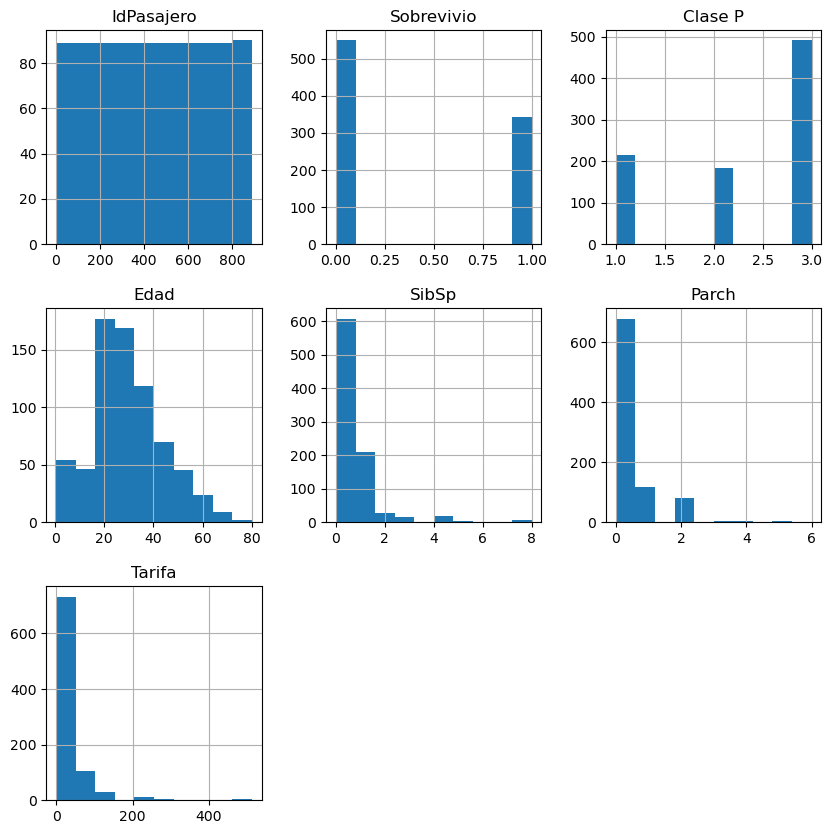

In [8]:
#Visualización de los datos 
data.hist(figsize=(10, 10))
plt.show()

<Axes: >

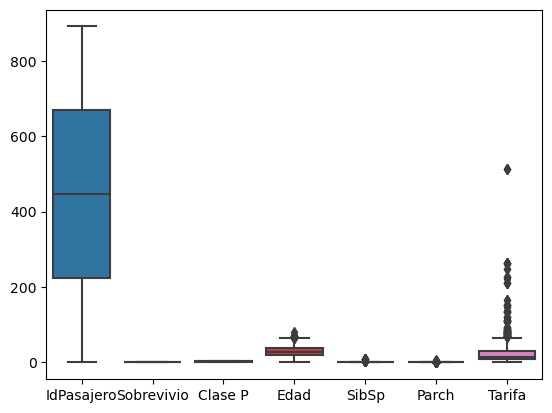

In [9]:
#Identificación de valores faltantes y atípicos mediante una grafica 

# Diagramas de caja para cada variable
sns.boxplot(data=data)

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [10]:
# Los valores de 'Sexo' son 'Male' y 'Female'.
# Se asigna 1 a 'Male' y 2 a 'Female' usando el método 'map' o 'replace'.

# Creación de un diccionario de mapeo para la codificación
genero_mapeo = {'male': 1, 'female': 2}

# Reemplazar la columna 'Genero' con valores numéricos utilizando el diccionario de mapeo
data['Sexo'] = data['Sexo'].map(genero_mapeo)

In [11]:
# Los valores de 'Embarcado' son 'S', 'C' y 'Q'.
# Se asigna 1 a 'S', 2 a 'C' y 3 a 'Q' usando el método 'map' o 'replace'.

# Creación de un diccionario de mapeo para la codificación
genero_mapeo = {'S': 1, 'C': 2, 'Q': 3}

# Reemplazar la columna 'Genero' con valores numéricos utilizando el diccionario de mapeo
data['Embarcado'] = data['Embarcado'].map(genero_mapeo)

In [12]:
data.head(10)

,IdPasajero,Sobrevivio,Clase P,Sexo,Edad,SibSp,Parch,Tarifa,Embarcado
0,1,0,3,1,22.0,1,0,7.2500,1.0
1,2,1,1,2,38.0,1,0,71.2833,2.0
2,3,1,3,2,26.0,0,0,7.9250,1.0
3,4,1,1,2,35.0,1,0,53.1000,1.0
4,5,0,3,1,35.0,0,0,8.0500,1.0
5,6,0,3,1,NaN,0,0,8.4583,3.0
6,7,0,1,1,54.0,0,0,51.8625,1.0
7,8,0,3,1,2.0,3,1,21.0750,1.0
8,9,1,3,2,27.0,0,2,11.1333,1.0
9,10,1,2,2,14.0,1,0,30.0708,2.0


In [13]:
# Comprobando valores nulos
data.isnull().sum()*100/data.shape[0]

IdPasajero     0.000000
Sobrevivio     0.000000
Clase P        0.000000
Sexo           0.000000
Edad          19.865320
SibSp          0.000000
Parch          0.000000
Tarifa         0.000000
Embarcado      0.224467
dtype: float64

In [14]:
# Manejo de datos faltantes 
# Reemplazar todos los valores vacios con el valor medio (promedio) de la columna cuando la variable es númerica
# Cuando la variable es categorica se imputa los valores con la moda de dicha variable.

for variables in data.columns:
    if data[variables].dtype == 'object':  # Comprobando si la columna es categórica
        data[variables].fillna(data[variables].mode()[0], inplace=True)  # Imputar con la moda
    else:
        data[variables].fillna(data[variables].mean(), inplace=True)  # Imputar con la media

In [15]:
#Revisión de datos faltantes
for variable in data.columns:
    print("Cantidad de registros vacíos en {}: {}".format(variable.capitalize(), data[variable].isna().sum()))

Cantidad de registros vacíos en Idpasajero: 0
Cantidad de registros vacíos en Sobrevivio: 0
Cantidad de registros vacíos en Clase p: 0
Cantidad de registros vacíos en Sexo: 0
Cantidad de registros vacíos en Edad: 0
Cantidad de registros vacíos en Sibsp: 0
Cantidad de registros vacíos en Parch: 0
Cantidad de registros vacíos en Tarifa: 0
Cantidad de registros vacíos en Embarcado: 0


In [16]:
# Lista de columnas númericas
columnas_interes = ['Edad', 'SibSp', 'Parch','Tarifa']

for columna in columnas_interes:
    # Calcular los cuartiles y el rango intercuartílico (IQR)
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular los límites para identificar los valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar los valores atípicos
    valores_atipicos = ((data[columna] < limite_inferior) | (data[columna] > limite_superior)).sum()
    
    # Imprimir los valores atípicos
    print(f"Datos atípicos de {columna} es: {valores_atipicos}")

Datos atípicos de Edad es: 66
Datos atípicos de SibSp es: 46
Datos atípicos de Parch es: 213
Datos atípicos de Tarifa es: 116


In [18]:
# Creación de un DataFrame para almacenar los datos filtrados
data_filtrados = data.copy()

for columna in columnas_interes:
    # Calcular los cuartiles y el rango intercuartílico (IQR)
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular los límites para identificar los valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar los valores atípicos
    valores_atipicos = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)][columna]
    
    # Filtrar los datos para eliminar los valores atípicos
    data_filtrados = data_filtrados[(data_filtrados[columna] >= limite_inferior) & (data_filtrados[columna] <= limite_superior)]

# Verificar el tamaño de los datos filtrados
print("Tamaño de los datos filtrados:")
print(data_filtrados.shape)

Tamaño de los datos filtrados:
(577, 9)


In [19]:
data_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IdPasajero  577 non-null    int64  
 1   Sobrevivio  577 non-null    int64  
 2   Clase P     577 non-null    int64  
 3   Sexo        577 non-null    int64  
 4   Edad        577 non-null    float64
 5   SibSp       577 non-null    int64  
 6   Parch       577 non-null    int64  
 7   Tarifa      577 non-null    float64
 8   Embarcado   577 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 45.1 KB


<Axes: >

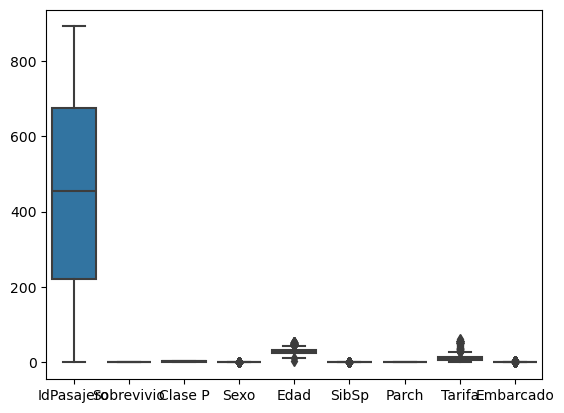

In [20]:
#Identificación de valores faltantes y atípicos mediante una grafica 

# Diagramas de caja para cada variable
sns.boxplot(data=data_filtrados)

### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Característica de interes:
- Variable dependiente (Sobrevivió): Si el pasajero sobrevivió al naufragio, codificada como 0 (no) y 1 (si). Esta es la variable respuesta que interesa predecir.
- Predecir el precio del automóvil en función de sus atributos.

In [21]:
# Total de personas que sobrevivieron

data_filtrados['Sobrevivio'].value_counts()

Sobrevivio
0    404
1    173
Name: count, dtype: int64

In [22]:
data_filtrados[['Sobrevivio']].head(20)

,Sobrevivio
0,0
2,1
3,1
4,0
5,0
6,0
9,1
12,0
14,0
17,1


### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [23]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = data_filtrados.drop('Sobrevivio',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = data_filtrados['Sobrevivio'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [24]:
print (X_train)

     IdPasajero  Clase P  Sexo       Edad  SibSp  Parch   Tarifa  Embarcado
884         885        3     1  25.000000      0      0   7.0500        1.0
568         569        3     1  29.699118      0      0   7.2292        2.0
749         750        3     1  31.000000      0      0   7.7500        3.0
810         811        3     1  26.000000      0      0   7.8875        1.0
667         668        3     1  29.699118      0      0   7.7750        1.0
..          ...      ...   ...        ...    ...    ...      ...        ...
192         193        3     2  19.000000      1      0   7.8542        1.0
602         603        1     1  29.699118      0      0  42.4000        1.0
14           15        3     2  14.000000      0      0   7.8542        1.0
821         822        3     1  27.000000      0      0   8.6625        1.0
471         472        3     1  38.000000      0      0   8.6625        1.0

[432 rows x 8 columns]


In [25]:
print (Y_train)

884    0
568    0
749    0
810    0
667    0
      ..
192    1
602    0
14     0
821    1
471    0
Name: Sobrevivio, Length: 432, dtype: int64


### 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [37]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [38]:
print (Y_test)

696    0
778    0
350    0
653    1
886    0
      ..
793    0
392    0
276    0
573    1
223    0
Name: Sobrevivio, Length: 145, dtype: int64


In [39]:
print (Prediccion)

[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0]


### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [40]:
# Desempeño del modelo de regresión
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       102
           1       0.85      0.53      0.66        43

    accuracy                           0.83       145
   macro avg       0.84      0.75      0.77       145
weighted avg       0.84      0.83      0.82       145



### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

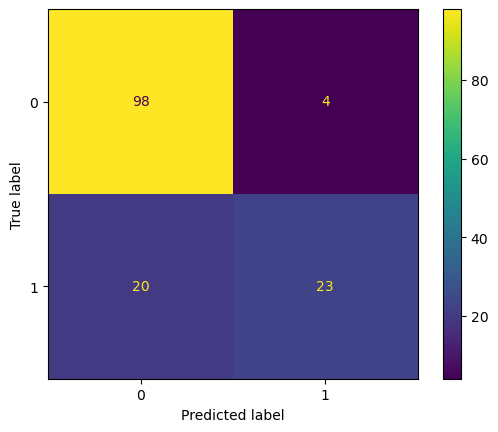

In [41]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Matriz de Correlación:


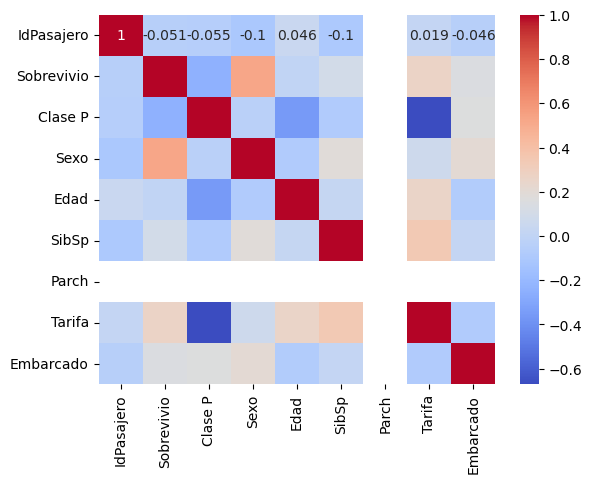

            IdPasajero  Sobrevivio   Clase P      Sexo      Edad     SibSp  \
IdPasajero    1.000000   -0.050556 -0.054511 -0.104019  0.045852 -0.102197   
Sobrevivio   -0.050556    1.000000 -0.242189  0.526748  0.006573  0.097999   
Clase P      -0.054511   -0.242189  1.000000 -0.037617 -0.354983 -0.078664   
Sexo         -0.104019    0.526748 -0.037617  1.000000 -0.079316  0.185057   
Edad          0.045852    0.006573 -0.354983 -0.079316  1.000000  0.024616   
SibSp        -0.102197    0.097999 -0.078664  0.185057  0.024616  1.000000   
Parch              NaN         NaN       NaN       NaN       NaN       NaN   
Tarifa        0.019040    0.268890 -0.670942  0.070345  0.261098  0.345588   
Embarcado    -0.046220    0.149799  0.159747  0.205606 -0.075507  0.014744   

            Parch    Tarifa  Embarcado  
IdPasajero    NaN  0.019040  -0.046220  
Sobrevivio    NaN  0.268890   0.149799  
Clase P       NaN -0.670942   0.159747  
Sexo          NaN  0.070345   0.205606  
Edad          

In [64]:
#Matrix de Correlación del modelo
print("\033[1mMatriz de Correlación:\033[0m")
correlation_matrix = data_filtrados.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Calcular la matriz de correlación
correlation_matrix = data_filtrados.corr()
# Imprimir los valores de la matriz de correlación
print(correlation_matrix)

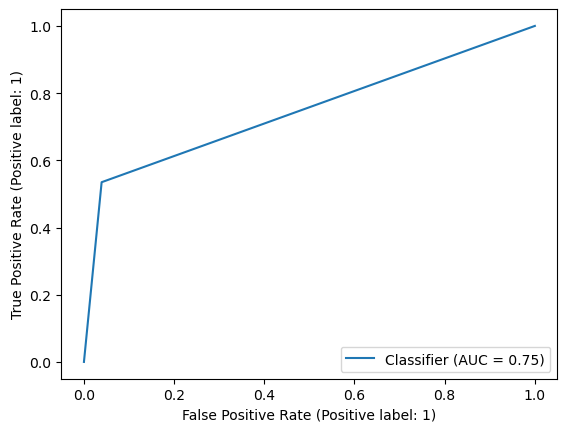

In [57]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

### 8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

- Precisión: La precisión mide la proporción de predicciones positivas verdaderas (TP) entre todas las predicciones positivas realizadas por el modelo (es decir, verdaderos positivos más falsos positivos, FP). Aquí la precisión para la clase "Sobrevivió" es 0,85, lo que significa que el 85% de los predichos como sobrevivientes por el modelo eran en realidad sobrevivientes del hundimiento del RMS Titanic.
- Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "Sobrevivió" es 0,53, lo que indica que el modelo es capaz de identificar correctamente más de la mitad de las instancias positivas reales. Sin embargo, también significa que el modelo no detecta el 47% restante, lo cual podría ser significativo dependiendo del contexto.
- F1 Score: Es la media armónica de precisión y recuperación. Es particularmente útil en situaciones donde existe un desequilibrio entre las clases positivas y negativas. Una puntuación F1 de 0,66 como el generado en el modelo, sugiere que el modelo tiene un rendimiento razonablemente equilibrado entre precisión y recall para la clase "Sobrevivió". En este caso, el modelo no solo es capaz de identificar correctamente una cantidad considerable de verdaderos positivos, sino que también mantiene un nivel aceptable de precisión en sus predicciones positivas.
- 
De la Matriz de Confusión podemos interpretar:

- Verdaderos negativos (TN): El recuento de observaciones que un clasificador predijo correctamente como falsas es 98. Esto significa que el clasificador identificó correctamente 98 instancias que en realidad no pertenecían a la clase positiva.
- Verdaderos positivos (TP): El recuento de observaciones que un clasificador predijo correctamente como verdaderas es 23. Esto indica que el clasificador identificó correctamente 23 instancias que realmente pertenecían a la clase positiva.
- Falsos positivos (FP): El recuento de observaciones que un clasificador predijo incorrectamente como verdaderas es 4. Es decir, el clasificador etiquetó incorrectamente 4 instancias como positivas cuando en realidad eran negativas.
- Falsos negativos (FN): El recuento de observaciones que un clasificador predijo incorrectamente como falsas es 20. Esto significa que el clasificador no identificó 20 instancias que realmente eran positivas.

De la curva de precisión del modelo se puede interpretar:
- El AUC (Área Bajo la Curva) de la curva de precisión-recall es 0,75, lo que indica que el modelo tiene un buen rendimiento en términos de identificar correctamente las instancias positivas y minimizar las falsas alarmas. Este valor refleja la capacidad del modelo para mantener un buen equilibrio entre precisión y recall en todos los umbrales de clasificación. Esto significa que el modelo es capaz de distinguir correctamente entre las clases positivas y negativas en el 75% de los casos.

Correlaciones
- Sexo y Supervivencia: La correlación alta entre "Sexo" y "Sobrevivió" sugiere que el género fue un factor importante en la probabilidad de supervivencia, equivalente a 0,52.
- Clase y Supervivencia: La correlación negativa entre "Clase P" y "Sobrevivió" muestra que los pasajeros de clase alta tenían más probabilidades de sobrevivir, equivalente a -0,24.
- Tarifa y Clase: La fuerte correlación negativa entre "Tarifa" y "Clase P" indica que las tarifas más altas estaban asociadas con clases más altas, equivalente a -0.67.
- Tarifa y Supervivencia: La correlación positiva entre "Tarifa" y "Sobrevivió" sugiere que los pasajeros que pagaron tarifas más altas tenían mayores probabilidades de sobrevivir, probablemente debido a estar en clases más altas, equivalente a 0,27.
- Familiares y Tarifa: La correlación entre "SibSp" y "Tarifa" sugiere que los pasajeros que viajaban con más familiares tendían a pagar tarifas más altas, equivalente a 0,34.

Estas correlaciones ayudan a identificar los factores que influyeron en la supervivencia de los pasajeros del Titanic. Los datos sugieren que el género, la clase y la tarifa pagada fueron factores significativos. Las mujeres y los pasajeros de clases más altas (que pagaron tarifas más altas) tenían mayores probabilidades de sobrevivir. 